In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.core.multiarray import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Выбор датасета

Выбранный датасет содержит цены домов и значения различных признаков, которые могут повлиять на стоимость. Т.к. данная задача предполагает построение одномерной линейной регрессии, то буду исследовать как на цены домов влияет уровень преступности.

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
boston_dataset = pd.DataFrame(np.column_stack((X[:, 0], y)), columns=["crime_rate", "target"])
boston_dataset.sort_values("crime_rate", inplace=True)

In [4]:
X = boston_dataset["crime_rate"].values
y = boston_dataset["target"].values

In [5]:
print(X.shape, y.shape)

(506,) (506,)


### 2. Построение модели

In [6]:
class Polynom():
    def __init__(self, degree: int):
        self.degree = degree
        self.coefs = None
        
        if self.degree <= 0:
            raise ValueError()
        
    def fit(self, X: ndarray, y: ndarray) -> None:
        X = get_x_maxtrix(X, self.degree)
        y = y.reshape(-1, 1)
        self.coefs = inv(X.T @ X) @ X.T @ y
    
    def predict(self, X: ndarray) -> ndarray:
        X_ = get_x_maxtrix(X, self.degree)
        y_pred = X_ @ self.coefs
        return y_pred.reshape(-1)
    
    def fit_predict(self, X: ndarray, y: ndarray) -> ndarray:
        self.fit(X, y)
        return self.predict(X)
        
def get_x_maxtrix(X: ndarray, degree: int):
    i = degree
    X_ = list()

    while(i != 0):
        X_.append(np.power(X, i))
        i -= 1
    else:
        X_.append(np.ones(len(X)))

    return np.column_stack(X_)

In [7]:
polynom_degree_1 = Polynom(degree=1)
polynom_degree_2 = Polynom(degree=2)
polynom_degree_3 = Polynom(degree=3)

In [8]:
y_pred_1 = polynom_degree_1.fit_predict(X, y)
y_pred_2 = polynom_degree_2.fit_predict(X, y)
y_pred_3 = polynom_degree_3.fit_predict(X, y)

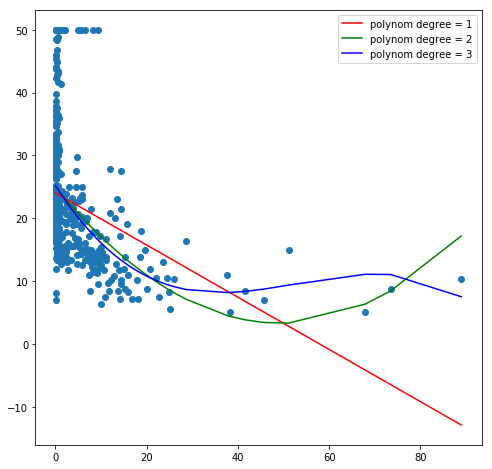

In [9]:
plt.figure(1, figsize=(8, 8))
plt.scatter(X, y)
plt.plot(X, y_pred_1, 'r-', label="polynom degree = 1")
plt.plot(X, y_pred_2, 'g-', label="polynom degree = 2")
plt.plot(X, y_pred_3, 'b-', label="polynom degree = 3")
plt.legend()
plt.show()

### 3. Выбросы и валидация

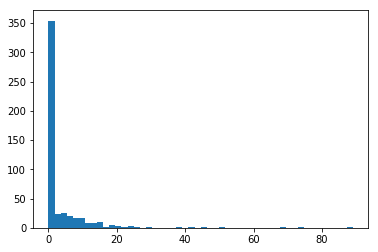

In [10]:
plt.hist(X, bins=50)
plt.show()

Признак имеет несколько точек с аномально большим значением. В качестве выбрасов, например, можем рассматривать точки со значением больше 99 процентиля. 

In [11]:
print(f"99-ый процентиль: {np.percentile(X, 99)}")

99-ый процентиль: 41.37032999999997


In [12]:
print(f"Число выбросов: {X[X > np.percentile(X, 99)].shape[0]}")

Число выбросов: 6


Разбиваем наш датасет на обучающую и тестовую выборку

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
mse = list()
for i in range(1, 11):
    model = Polynom(degree=i)
    model.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, model.predict(X_test)))

Отобразим как меняется ошибка в зависимости от степени полинома.

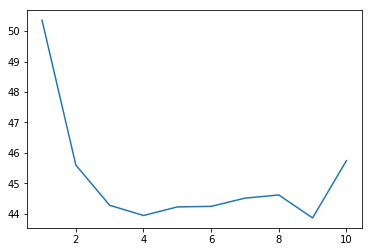

In [15]:
plt.plot(np.arange(1, 11), np.array(mse))
plt.show()

В данном примере степень многочлена 4 - является оптимальной. С дальнейшим увеличением степени полинома, модель начинает переобучаться.  